In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [275]:
pruning='0.7'

In [276]:
bud_df = pd.read_csv('/Users/joel/Projects/sep-multi2/opti-bud.csv',names=['e','n','bud_number','size','bud_percentage','mean_budtime'])
net_df = pd.read_csv('/Users/joel/Projects/sep-multi2/opti-net'+pruning+'.csv',header=0)

In [277]:
for c in bud_df.columns:
    bud_df[c] = bud_df[c].astype(float)
for c in net_df.columns:
    net_df[c] = net_df[c].astype(float)

In [278]:
# net_df.head(5)

In [279]:
criticalRegion = bud_df.query('bud_percentage > 0.05 & bud_percentage < 0.95')[['e','n']].values.tolist()
criticalNets = pd.DataFrame(columns=net_df.columns)
for c in criticalRegion:
    runNets = net_df[(net_df['Mean Affinity']==c[1]) & (net_df['Ligand Number']==c[0])]
    criticalNets = criticalNets.append(runNets)

In [280]:
bud_df = None
net_df = None

In [281]:
budNets = criticalNets[criticalNets['Mean Budding Time'] > 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()
nonbudNets = criticalNets[criticalNets['Mean Budding Time'] < 0.0].groupby(['Mean Affinity','Ligand Number']).mean().reset_index()

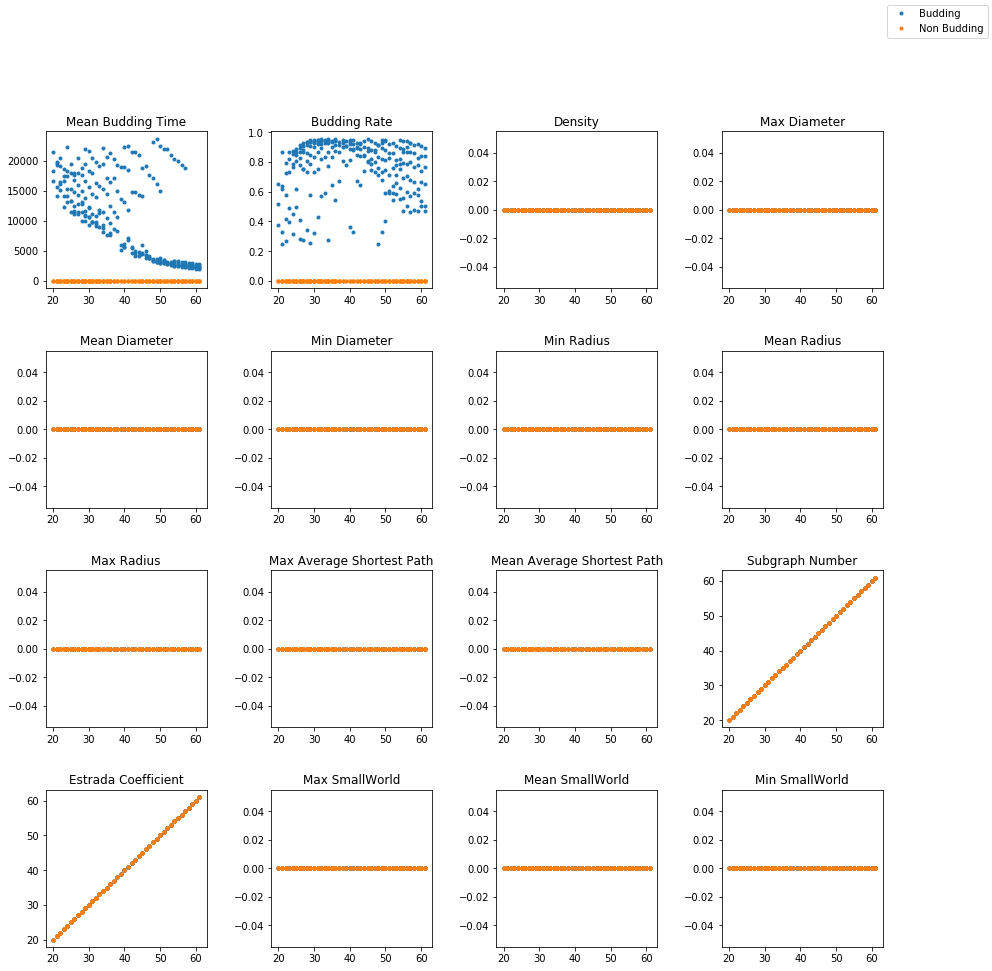

In [282]:
i = 1


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)
for c in budNets.columns:
    if c in ['Pruning','Ligand Number','Mean Affinity',"Fitness","Min Average Shortest Path"]:
        continue
    ax = plt.subplot(4, 4, i)
    ax.plot(budNets["Ligand Number"],budNets[c],'.',label="Budding")
    ax.plot(nonbudNets["Ligand Number"],nonbudNets[c],'.',label="Non Budding")
    plt.title(c)
    i+=1
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.show()